# <center> <span style="color:indigo">       Deep Learning</span> </center> 
##  <center> <span style="color:DarkBlue">      Tarea 1.  Ejercicio con una CNN. </span>  </center>
##  <center> <span style="color:DarkBlue"> Karla Guadalupe Ornelas Gamero</span>  </center>
##  <center> <span style="color:DarkBlue"> karla.gameroo@gmail.com</span>  </center>
##  <center> <span style="color:DarkBlue"> AGOSTO 2024</span>  </center>

##  Contenido
1. <span style="color:DarkBlue">Planteamiento del problema (qué hacer)</span>
2. <span style="color:DarkBlue">Planteamiento de la solución (cómo se hizó)</span>
3. <span style="color:DarkBlue">Ejemplo de ejecución (código)</span>
4. <span style="color:DarkBlue">Conclusiones </span>
5. <span style="color:DarkBlue">Referencias</span>


## <span style="color:DarkBlue"> 1. Planteamiento del problema</span>
Utilizando el dataset de Fashion MNIST de Keras, construir un mejor modelo de predicción utilizando una CNN. 
Debe mostrarse el entrenamiento por épocas, la pérdida y el nivel de precisión del modelo (mejorado). 
Para determinar la generalización del modelo propuesto, utilizar imágenes del conjunto de pruebas. 
Entregar el reporte de acuerdo a la rúbrica.

## <span style="color:DarkciónBlue"> 2. Planteamiento de la soluc ión</sp
Se cargara el  dataset directamente de keras para asi poder entrenar el modelo y mostrar los resultadoss. 

El código es:



#### Importando librerias

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import cv2
import random
import shutil
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(np.__version__)

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator



1.26.4
2.10.0


#### Cargar data

In [3]:

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Exploramos el dataset

In [5]:
print("train_images.shape:", train_images.shape)
print("len(train_labels):", len(train_labels))
print("train_labels:", train_labels)
print("test_images.shape:", test_images.shape)
print("len(test_labels):", len(test_labels)) 

train_images.shape: (60000, 28, 28)
len(train_labels): 60000
train_labels: [9 0 0 ... 3 0 5]
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


#### Procesamiento de los datos

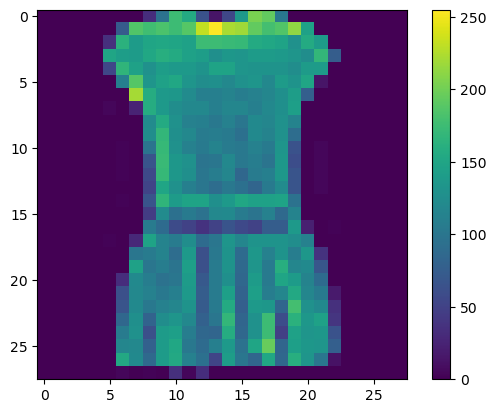

In [6]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

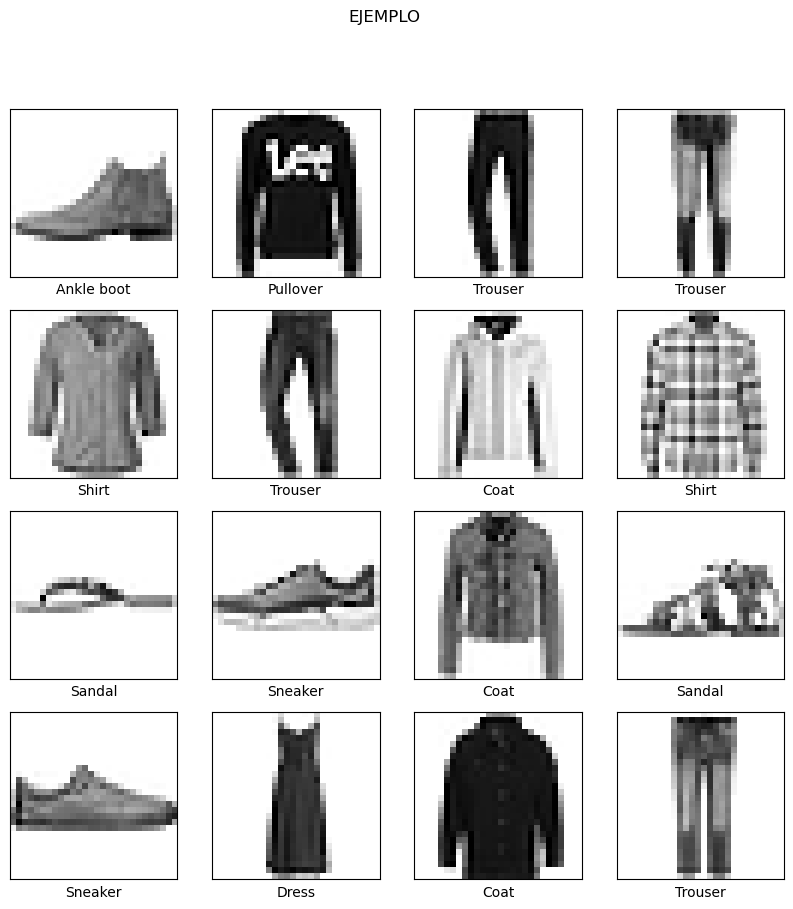

In [8]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.suptitle("EJEMPLO")

plt.show()

#### MODELO

In [9]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [10]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### ENTRENAMIENTO

In [11]:
history = model.fit(train_images, train_labels, epochs=100, batch_size=512, validation_split=0.20)

Epoch 1/100
94/94 [==============================] - 14s 140ms/step - loss: 1.9625 - accuracy: 0.3195 - val_loss: 1.3319 - val_accuracy: 0.5794
Epoch 2/100
94/94 [==============================] - 13s 134ms/step - loss: 0.9671 - accuracy: 0.6756 - val_loss: 0.7749 - val_accuracy: 0.7212
Epoch 3/100
94/94 [==============================] - 12s 133ms/step - loss: 0.7198 - accuracy: 0.7394 - val_loss: 0.6718 - val_accuracy: 0.7561
Epoch 4/100
94/94 [==============================] - 13s 133ms/step - loss: 0.6435 - accuracy: 0.7615 - val_loss: 0.6164 - val_accuracy: 0.7703
Epoch 5/100
94/94 [==============================] - 14s 147ms/step - loss: 0.6018 - accuracy: 0.7766 - val_loss: 0.5868 - val_accuracy: 0.7782
Epoch 6/100
94/94 [==============================] - 15s 162ms/step - loss: 0.5737 - accuracy: 0.7868 - val_loss: 0.5570 - val_accuracy: 0.7934
Epoch 7/100
94/94 [==============================] - 15s 161ms/step - loss: 0.5491 - accuracy: 0.7977 - val_loss: 0.5423 - val_accuracy:

#### EVALUACION

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3127 - accuracy: 0.8888 - 952ms/epoch - 3ms/step

Test accuracy: 0.8888000249862671


#### PREDICCIONES

In [13]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [14]:
predictions[4]

array([9.7018830e-02, 4.9625646e-04, 2.3445828e-02, 4.5078783e-03,
       4.0623039e-02, 7.6724236e-06, 8.3381331e-01, 3.4375577e-07,
       8.3963270e-05, 2.8464688e-06], dtype=float32)

In [15]:
np.argmax(predictions[4])

6

In [16]:
test_labels[2]

1

**Grafique** esto para poder ver todo el set de la prediccion de las 10 clases.

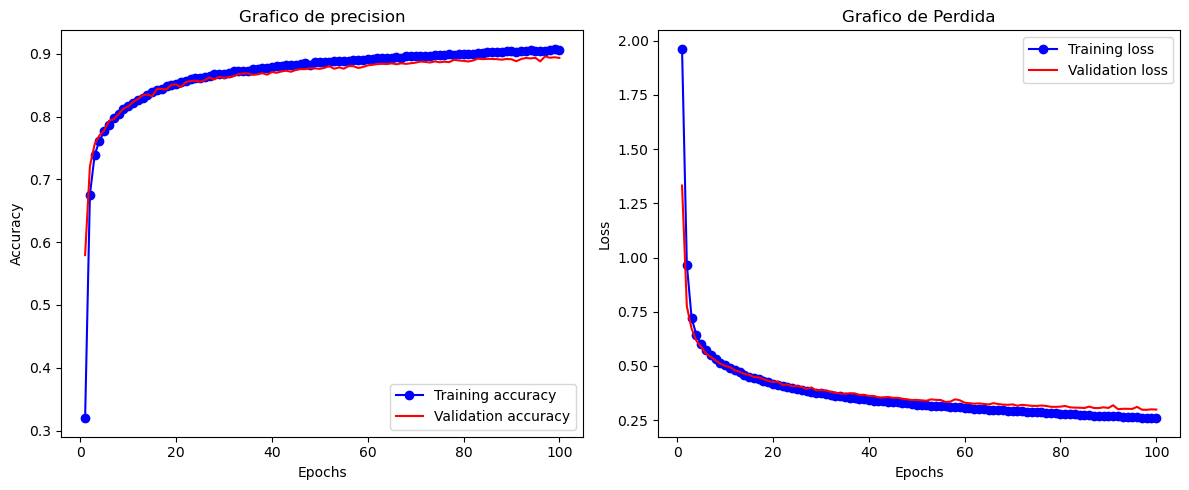

In [17]:


def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Gráfico de precisión
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
    plt.title('Grafico de precision')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Gráfico de pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation loss')
    plt.title('Grafico de Perdida')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar después de entrenar
plot_training_history(history)

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

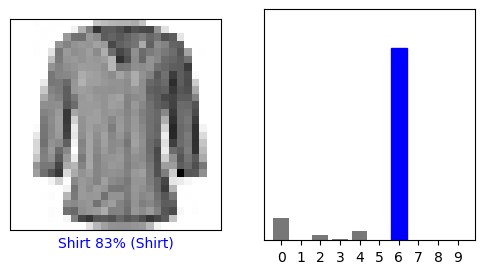

In [19]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

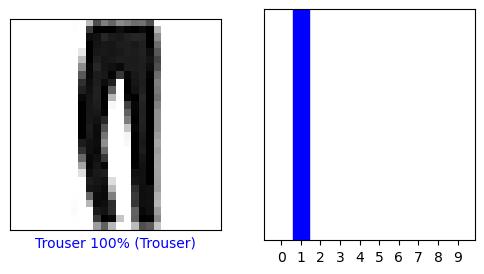

In [20]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Por último compilamos el modelo.

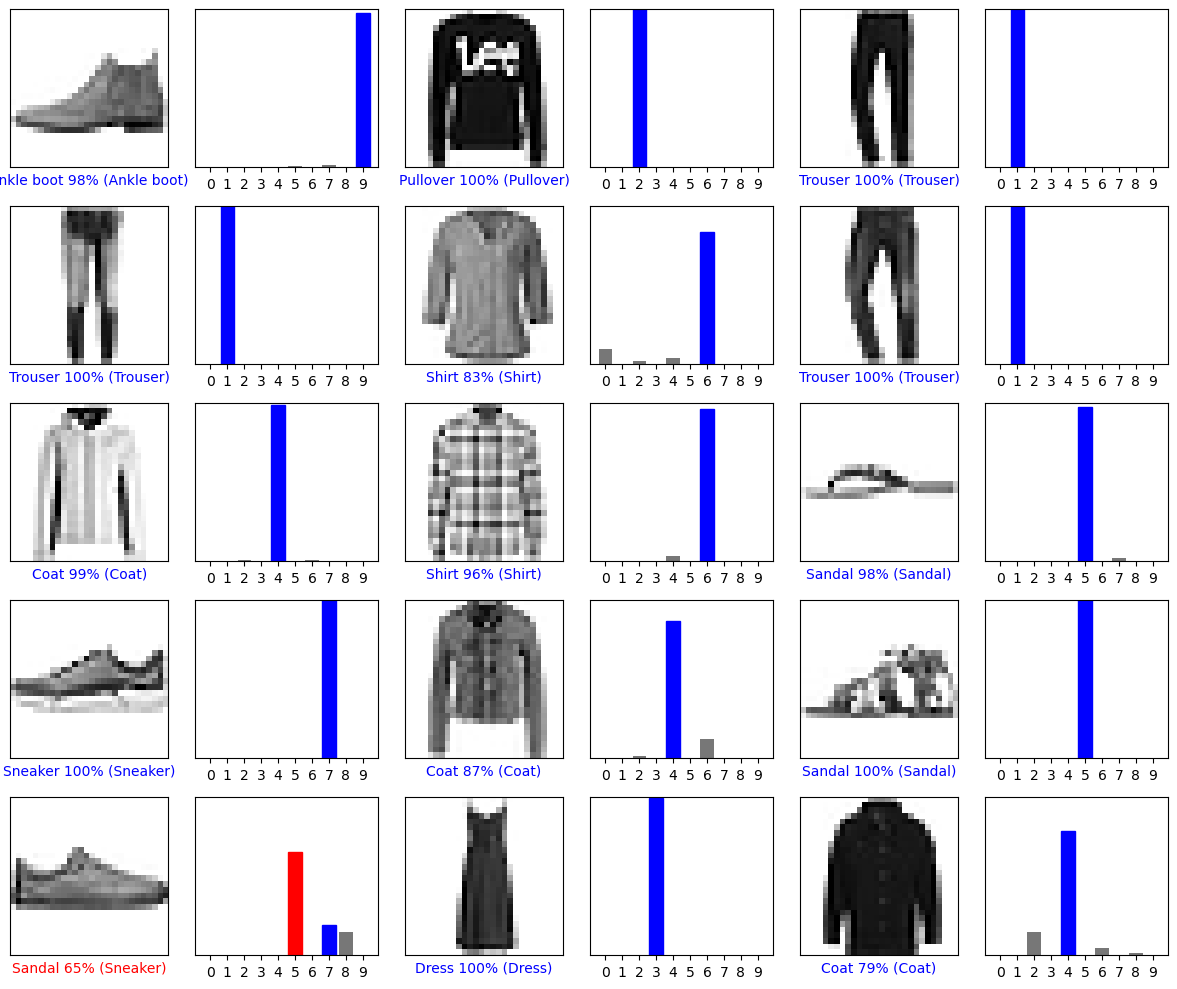

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [22]:

img = test_images[4]

print(img.shape)

(28, 28)


In [23]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 21ms/step
[[9.7018830e-02 4.9625896e-04 2.3445828e-02 4.5078816e-03 4.0623184e-02
  7.6724364e-06 8.3381313e-01 3.4375702e-07 8.3963569e-05 2.8464656e-06]]


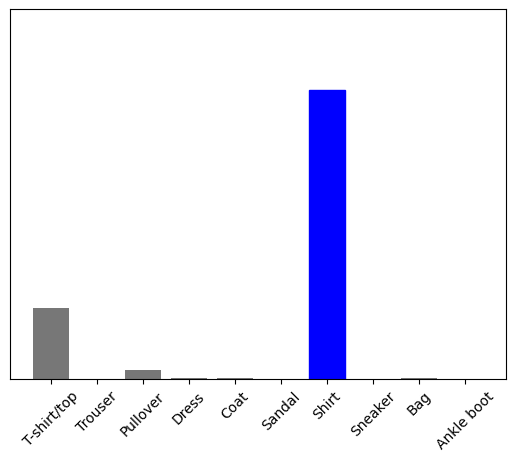

In [36]:
plot_value_array(4, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

6

## <span style="color:DarkciónBlue"> 4. Conclusión</span>
Como conclusion podemos ver como el modelo alcanzo una precision cercana al 90% tanto como el de entrenamiento como el de validación, por los datos de entrenamiento durante las primeras epocas lo que indica que el modelo esta aprediendo lo que se puede traducir a que el modelo no esta sobreajustándose. Aunque el modelo esta funcionando bien , algunas mejoras podria ser el aunmento de datos para mejorar el modelo y su capacidad de generalizacion, tambien puede ser con diferente numeros de capaz y otros optimizadores.


